In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

# **2. Exploratory Data Analysis**
---

### **2.1 Load Data**
---

In [2]:
# Import dataset
loan_data = pd.read_csv('train.csv')

# Data check
with pd.option_context('display.max_rows', 1000):
    display(loan_data.head().T)

,0,1,2,3,4
loan_amnt,9975.0,5000.0,6000.0,20000.0,16000.0
int_rate,17.57,12.69,16.55,16.59,7.89
grade,D,C,D,D,A
emp_length,1 year,NaN,< 1 year,< 1 year,10+ years
home_ownership,RENT,RENT,RENT,RENT,RENT
annual_inc,26500.0,30000.0,54000.0,50000.0,87000.0
verification_status,Not Verified,Verified,Verified,Verified,Source Verified
issue_d,2014Q2,2015Q3,2015Q4,2014Q2,2015Q4
loan_status,1,0,0,0,0
purpose,credit_card,debt_consolidation,moving,debt_consolidation,credit_card


In [3]:
# Check for the data type
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434715 entries, 0 to 434714
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             434715 non-null  float64
 1   int_rate              434715 non-null  float64
 2   grade                 434715 non-null  object 
 3   emp_length            409385 non-null  object 
 4   home_ownership        434715 non-null  object 
 5   annual_inc            434713 non-null  float64
 6   verification_status   434715 non-null  object 
 7   issue_d               434715 non-null  object 
 8   loan_status           434715 non-null  int64  
 9   purpose               434715 non-null  object 
 10  addr_state            434715 non-null  object 
 11  dti                   434715 non-null  float64
 12  delinq_2yrs           434698 non-null  float64
 13  earliest_cr_line      434698 non-null  object 
 14  fico_range_low        434715 non-null  float64
 15  

* Category 1 (personal information): `emp_length`, `home_ownership`, `annual_inc`, `verification_status`, `purpose`, `addr_state`, `application type`
* Category 2 (loan information): `loan_amnt`, `int_rate`, `grade`, `dti`, `fico_range_low`, `fico_range_high`
* Category 3 (account information): `open_acc`, `pub_rec`, `pub_rec_bankruptcies`, `revol_util`, `num_bc_tl`, `num_il_tl`, `num_op_rev_tl`, `num_rev_accts`, `num_rev_tl_bal_gt_0`, `num_sats`, `mo_sin_old_il_acct`, `mo_sin_old_rev_tl_op`, `delinq_2yrs`, `mort_acc`, `revol_bal`, `initial_list_status`,  `earliest_cr_line`

In [4]:
# Set response variable
response_variable = 'loan_status'

In [5]:
# Find observations with many null values 
loan_data.isnull().sum(axis=1).value_counts()

0     359453
1      35146
9      24815
7       6467
8       5024
2       2080
10      1704
15        15
11         8
16         2
3          1
Name: count, dtype: int64

We will check observations with > 10 null values.

In [6]:
# Check observations with more than 10 null values
loan_data[loan_data.isnull().sum(axis=1) > 10]

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pub_rec_bankruptcies
43474,5000.0,21.36,F,NaN,MORTGAGE,35000.0,Not Verified,2011Q3,0,home_improvement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
56718,1200.0,9.01,B,< 1 year,RENT,36000.0,Not Verified,2007Q2,0,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78054,7200.0,10.28,C,< 1 year,RENT,95000.0,Not Verified,2007Q3,0,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80184,1000.0,19.03,E,NaN,OWN,31800.0,Not Verified,2012Q1,1,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
90160,3750.0,15.65,F,5 years,MORTGAGE,7280.0,Not Verified,2007Q3,1,moving,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92203,3000.0,7.43,A,1 year,MORTGAGE,80000.0,Not Verified,2007Q2,0,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120658,6450.0,11.22,C,2 years,RENT,32000.0,Not Verified,2007Q2,0,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151751,6000.0,10.91,C,< 1 year,RENT,7000.0,Not Verified,2007Q3,1,house,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159086,1900.0,9.64,B,1 year,MORTGAGE,100000.0,Not Verified,2007Q3,0,debt_consolidation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176973,3000.0,9.01,B,< 1 year,RENT,35000.0,Not Verified,2007Q2,0,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since most of those observations come from old data (2007), we can drop those observations.

In [7]:
# Drop observations with more than 10 null values using threshold
loan_data.dropna(thresh = 22, 
                 inplace = True)

In [8]:
# Check null values of observations
loan_data.isnull().sum(axis=1).value_counts()

0     359453
1      35146
9      24815
7       6467
8       5024
2       2080
10      1704
3          1
Name: count, dtype: int64

### **2.2 Exploratory Data Analysis**
---

Function to calculate the odds 

In [9]:
def calculate_odds(data, predictor_label):
    # Frequency of default by predictor label
    crosstab = pd.crosstab(data[predictor_label],
                           data[response_variable],
                           margins = False)
    
    # Calculate offs
    crosstab['Odds'] = np.round((crosstab[1]/crosstab[0]),2)

    # Sort by the odds value
    crosstab = crosstab.sort_values(by = 'Odds',
                                    ascending = False)
    
    return crosstab

#### **Category 1**

##### Predictor 1: `emp_length`

In [179]:
# Check null value
loan_data['emp_length'].isnull().sum()

25325

Fill missing value with attribute 'missing'

In [11]:
# Fill null value with 'missing
loan_data['emp_length'].fillna(value = 'missing',
                               inplace = True)

In [12]:
# Describe the proportion of `emp_length` or employment length in years
loan_data['emp_length'].value_counts(normalize = True)

emp_length
10+ years    0.307081
2 years      0.091957
< 1 year     0.083761
3 years      0.081870
1 year       0.067637
5 years      0.063565
4 years      0.060834
missing      0.058260
7 years      0.049891
6 years      0.048770
8 years      0.048660
9 years      0.037714
Name: proportion, dtype: float64

In [13]:
# Order of attributes
order_emp = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years',
             '7 years', '8 years', '9 years', '10+ years', 'missing']

loan_data['emp_length'] = pd.Categorical(loan_data['emp_length'],
                                         categories = order_emp)

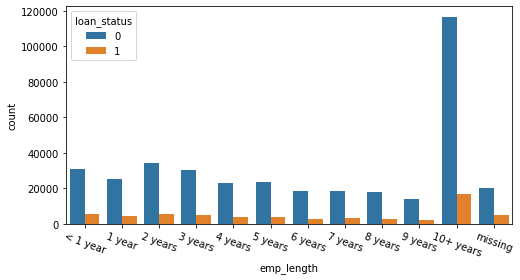

In [14]:
# Create plot count for emp_length with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'emp_length',
              hue = response_variable)

plt.xticks(rotation = -20)  
plt.show()

In [15]:
# Crosstab for emp_length
odds_emp = calculate_odds(data = loan_data,
                          predictor_label = 'emp_length')

odds_emp

loan_status,0,1,Odds
emp_length,,,
missing,20088,5237,0.26
< 1 year,31140,5270,0.17
1 year,25168,4233,0.17
2 years,34405,5568,0.16
3 years,30625,4963,0.16
4 years,22815,3629,0.16
5 years,23840,3791,0.16
6 years,18261,2939,0.16
7 years,18676,3011,0.16


* Proportion of debtors with 10+ years employment is the largest and has the lowest odds of bad loan among other attributes.
* 'missing' value has the highest odds at 0.26.
* We will convert into ordinal characteristic for binning process later.

In [16]:
# Convert into ordinal characteristic
loan_data['emp_length'] = loan_data['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                                           '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                                           '8 years': 8, '9 years': 9, '10+ years': 10, 'missing': np.nan})

loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

In [17]:
# Descriptive of 'emp_length' by response loan_status
loan_data['emp_length'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,353985.0,5.866455,3.671410,0.0,2.0,6.0,10.0,10.0
1,55380.0,5.670386,3.667512,0.0,2.0,6.0,10.0,10.0


<Axes: xlabel='loan_status', ylabel='emp_length'>

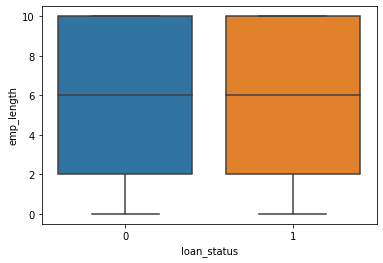

In [18]:
# Boxplot of 'emp_length' by response loan_status
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'emp_length')

* The boxplot shows median of employment length from bad loan group is same from good loan group. 
* However, mean from bad loan group is slightly lower from good loan group.

##### Predictor 2: `home_ownership`

In [19]:
# Check null value
loan_data['home_ownership'].isnull().sum()

0

In [20]:
# Describe the proportion of `home_ownership` 
loan_data['home_ownership'].value_counts(normalize = True)

home_ownership
MORTGAGE    0.464057
RENT        0.434135
OWN         0.101447
OTHER       0.000292
NONE        0.000064
ANY         0.000005
Name: proportion, dtype: float64

In [21]:
# Replacee 'NONE' and 'ANY' with 'OTHER' 
loan_data['home_ownership'].replace(['NONE', 'ANY'],
                                     'OTHER',
                                     inplace = True)

loan_data['home_ownership'].value_counts(normalize = True)

home_ownership
MORTGAGE    0.464057
RENT        0.434135
OWN         0.101447
OTHER       0.000361
Name: proportion, dtype: float64

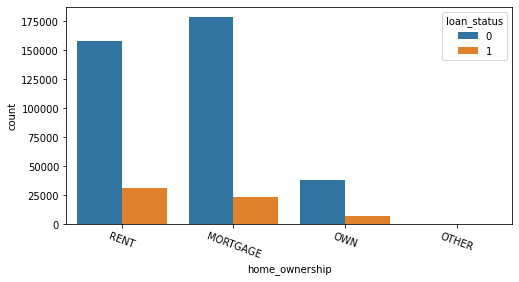

In [22]:
# Create plot count for `home_ownership` with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'home_ownership',
              hue = response_variable)

plt.xticks(rotation = -20)  
plt.show()

In [23]:
# Crosstab for `home_ownership`
odds_home = calculate_odds(data = loan_data,
                           predictor_label = 'home_ownership')

odds_home

loan_status,0,1,Odds
home_ownership,,,
OTHER,130,27,0.21
RENT,157692,31022,0.20
OWN,37592,6506,0.17
MORTGAGE,178659,23062,0.13


* Status 'RENT' and 'OTHER' has the highest odds of bad loan at 0.20.
* Status 'OWN' has a slightly lower odds at 0.17.
* Status 'MORTGAGE' has the lowest odss at 0.13.

##### Predictor 3: `annual_inc`

In [24]:
# Check null value
loan_data['annual_inc'].isnull().sum()

0

In [25]:
# Descriptive statistics of 'annual_inc'
loan_data['annual_inc'].describe()

count    4.346900e+05
mean     7.245368e+04
std      6.543845e+04
min      1.770000e+03
25%      4.300000e+04
50%      6.000000e+04
75%      8.700000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc', ylabel='Count'>

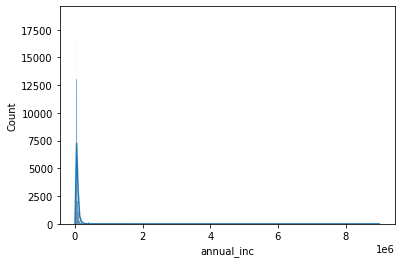

In [26]:
# Distribution plot of 'annual_inc'
sns.histplot(data = loan_data,
             x = 'annual_inc',
             kde = True)

In [27]:
# Descriptive of 'annual_inc' by response loan_status
loan_data['annual_inc'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,73809.277175,63935.723796,1770.0,44000.0,62000.0,90000.0,9000000.0
1,60617.0,64088.155443,73489.434231,2000.0,38500.0,54000.0,76000.0,8900060.0


<Axes: xlabel='loan_status', ylabel='annual_inc'>

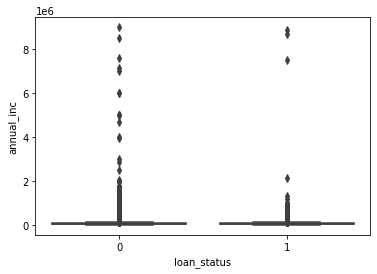

In [28]:
# Boxplot of 'annual_inc' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'annual_inc')

<Axes: xlabel='loan_status', ylabel='annual_inc'>

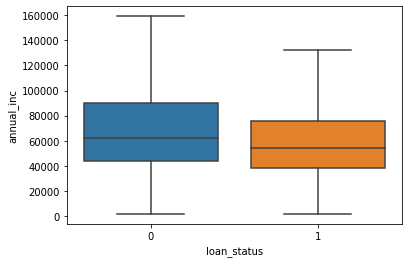

In [29]:
# Boxplot of 'annual_inc' by response variable without outliers
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'annual_inc',
            showfliers = False)

* The annual income of debtors has wide range value and there are many outliers which can be treated by binning.
* If we exclude the outliers, we can see that median of annual income from bad loan group is lower than from good loan group.

##### Predictor 4: `verification_status`

In [30]:
# Check null value
loan_data['verification_status'].isnull().sum()

0

In [31]:
# Describe the proportion of `verification_status` 
loan_data['verification_status'].value_counts(normalize = True)

verification_status
Source Verified    0.351554
Not Verified       0.349847
Verified           0.298599
Name: proportion, dtype: float64

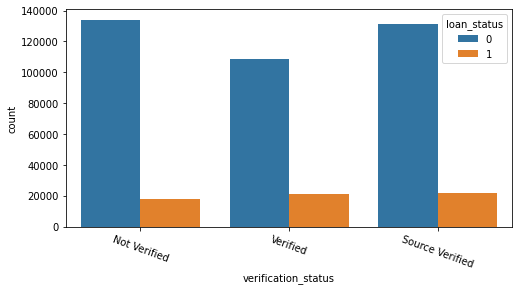

In [32]:
# Create plot count for `verification_status` with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'verification_status',
              hue = response_variable)

plt.xticks(rotation = -20)  
plt.show()

In [33]:
# Crosstab for `verification_status`
odds_verif = calculate_odds(data = loan_data,
                            predictor_label = 'verification_status')

odds_verif

loan_status,0,1,Odds
verification_status,,,
Verified,108645,21153,0.19
Source Verified,131273,21544,0.16
Not Verified,134155,17920,0.13


* Verified status has higher odds of bad loan than not-verified status. 

##### Predictor 5: `purpose`

In [34]:
# Check null value
loan_data['purpose'].isnull().sum()

0

In [35]:
# Describe the proportion of `purpose` 
loan_data['purpose'].value_counts(normalize = True)

purpose
debt_consolidation    0.565796
credit_card           0.242766
home_improvement      0.057772
other                 0.054963
major_purchase        0.020946
small_business        0.012130
car                   0.011263
medical               0.011192
moving                0.007511
vacation              0.006876
house                 0.004240
wedding               0.003140
renewable_energy      0.000778
educational           0.000626
Name: proportion, dtype: float64

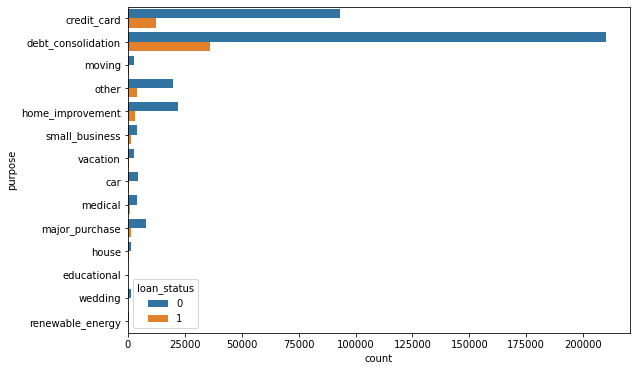

In [36]:
# Create plot count for `purpose` with response variable
plt.figure(figsize = (9,6))

sns.countplot(data = loan_data,
              y = 'purpose',
              hue = response_variable)

# plt.xticks(rotation = 20)  
plt.show()

In [37]:
# Crosstab for `purpose`
odds_purpose = calculate_odds(data = loan_data,
                              predictor_label = 'purpose')

odds_purpose

loan_status,0,1,Odds
purpose,,,
small_business,4067,1206,0.30
renewable_energy,270,68,0.25
moving,2643,622,0.24
educational,221,51,0.23
house,1518,325,0.21
medical,4025,840,0.21
other,19961,3931,0.20
vacation,2508,481,0.19
debt_consolidation,210119,35827,0.17


* Odds of bad loan from purpose characteristics has range from 0.12 to 0.30.
* 3 highest-odds are from attribute small business, renewable energy, and moving.
* 3 lowest-odds are from wedding, credit card, and car.

##### Predictor 6: `addr_state`

In [38]:
# Check null value
loan_data['addr_state'].isnull().sum()

0

In [39]:
# Describe the proportion of `addr_state` 
loan_data['addr_state'].value_counts(normalize = True)

addr_state
CA    0.154899
NY    0.085859
TX    0.080851
FL    0.070844
IL    0.040590
NJ    0.037098
PA    0.033343
GA    0.032428
OH    0.031611
VA    0.028077
NC    0.026405
MI    0.026016
AZ    0.023550
MA    0.022968
MD    0.022450
WA    0.022271
CO    0.021123
MN    0.017636
MO    0.015538
CT    0.015052
NV    0.014852
IN    0.014355
TN    0.013642
WI    0.013014
OR    0.012579
AL    0.011700
LA    0.011473
SC    0.011369
KY    0.009025
KS    0.008827
OK    0.008735
AR    0.007299
UT    0.006793
NM    0.005563
HI    0.005100
NH    0.004774
WV    0.004484
RI    0.004254
MS    0.004028
DC    0.002945
MT    0.002846
DE    0.002710
AK    0.002491
WY    0.002151
VT    0.002064
SD    0.002027
NE    0.001222
ME    0.000515
ND    0.000513
ID    0.000023
IA    0.000021
Name: proportion, dtype: float64

In [40]:
# Crosstab for `addr_state`
odds_addr = calculate_odds(data = loan_data,
                           predictor_label = 'addr_state')

odds_addr

loan_status,0,1,Odds
addr_state,,,
IA,7,2,0.29
MS,1421,330,0.23
NE,437,94,0.22
NV,5334,1122,0.21
OK,3146,651,0.21
AR,2635,538,0.20
TN,4957,973,0.20
AL,4267,819,0.19
SD,743,138,0.19


##### Predictor 7: `application_type`

In [41]:
# Check null value
loan_data['application_type'].isnull().sum()

0

In [42]:
# Describe the proportion of `application_type` 
loan_data['application_type'].value_counts(normalize = True)

application_type
Individual    0.999653
Joint App     0.000347
Name: proportion, dtype: float64

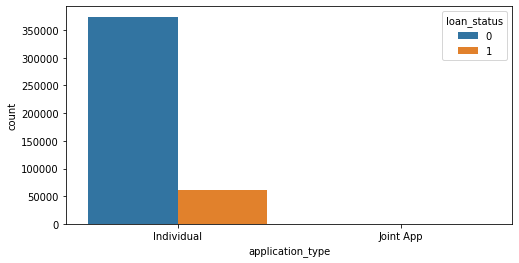

In [43]:
# Create plot count for `application_type` with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'application_type',
              hue = response_variable)

# plt.xticks(rotation = 20)  
plt.show()

In [44]:
# Crosstab for `application_type`
odds_apptype = calculate_odds(data = loan_data,
                              predictor_label = 'application_type')

odds_apptype

loan_status,0,1,Odds
application_type,,,
Joint App,128,23,0.18
Individual,373945,60594,0.16


* Joint application has higher odds of bad loan than individiual application.

#### **Category 2**

##### Predictor 1: `loan_amnt`

In [45]:
# Check null value
loan_data['loan_amnt'].isnull().sum()

0

In [46]:
# Descriptive statistics of 'loan_amnt'
loan_data['loan_amnt'].describe()

count    434690.000000
mean      12471.135234
std        7770.656184
min         500.000000
25%        6625.000000
50%       10000.000000
75%       16000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

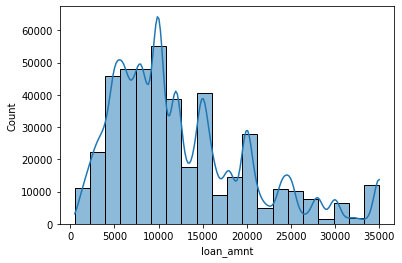

In [47]:
# Distribution plot of 'loan_amnt'
sns.histplot(data = loan_data,
             x = 'loan_amnt',
             bins = 20,
             kde = True)

In [48]:
# Descriptive of 'loan_amnt' by response loan_status
loan_data['loan_amnt'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,12528.555523,7786.995034,500.0,6700.0,10000.0,16000.0,35000.0
1,60617.0,12116.789432,7659.602273,500.0,6500.0,10000.0,15500.0,35000.0


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

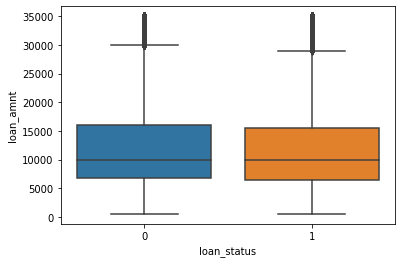

In [49]:
# Boxplot of 'loan_amnt' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'loan_amnt')

* Median of loan amount by loan status quite similar from good and bad loan group. However,the mean from bad loan group is slightly lower.

##### Predictor 2: `int_rate`

In [50]:
# Check null value
loan_data['int_rate'].isnull().sum()

0

In [51]:
# Descriptive statistics of 'int_rate'
loan_data['int_rate'].describe()

count    434690.000000
mean         12.013659
std           3.850625
min           5.320000
25%           8.900000
50%          11.990000
75%          14.350000
max          28.990000
Name: int_rate, dtype: float64

<Axes: xlabel='int_rate', ylabel='Count'>

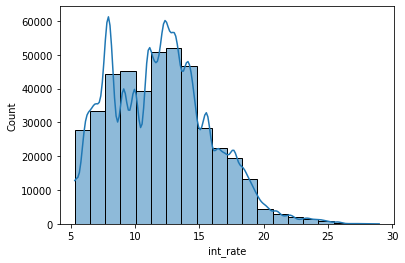

In [52]:
# Distribution plot of 'int_rate'
sns.histplot(data = loan_data,
             x = 'int_rate',
             bins = 20,
             kde = True)

In [53]:
# Descriptive of 'int_rate' by response loan_status
loan_data['int_rate'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,11.720955,3.783154,5.32,8.39,11.55,14.09,28.99
1,60617.0,13.819959,3.770227,5.32,11.49,13.66,16.40,28.99


<Axes: xlabel='loan_status', ylabel='int_rate'>

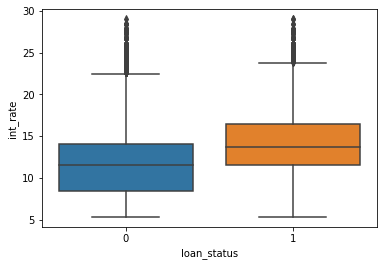

In [54]:
# Boxplot of 'int_rate' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'int_rate')

* Median of interest rate from bad loan group is higher than from good loan group.

##### Predictor 3: `grade`

In [55]:
# Check null value
loan_data['grade'].isnull().sum()

0

In [56]:
# Describe the proportion of `grade` 
loan_data['grade'].value_counts(normalize = True)

grade
B    0.341807
C    0.261301
A    0.230233
D    0.123341
E    0.034970
F    0.007256
G    0.001093
Name: proportion, dtype: float64

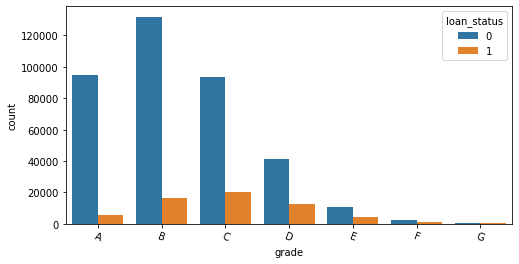

In [57]:
# Create plot count for `grade` with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'grade',
              order = 'ABCDEFG',
              hue = response_variable)

plt.xticks(rotation = -20)  
plt.show()

In [58]:
# Crosstab for `grade`
odds_grade = calculate_odds(data = loan_data,
                            predictor_label = 'grade')

odds_grade

loan_status,0,1,Odds
grade,,,
G,297,178,0.60
F,2111,1043,0.49
E,10832,4369,0.40
D,41064,12551,0.31
C,93234,20351,0.22
B,131996,16584,0.13
A,94539,5541,0.06


* Low grade has high odds of bad loan with highest odds reach value 0.6 for grade G.

##### Predictor 4: `dti`

In [59]:
# Check null value
loan_data['dti'].isnull().sum()

0

In [60]:
# Descriptive statistics of 'dti'
loan_data['dti'].describe()

count    434690.000000
mean         17.549462
std           8.382641
min           0.000000
25%          11.330000
50%          17.030000
75%          23.310000
max         999.000000
Name: dti, dtype: float64

<Axes: xlabel='dti', ylabel='Count'>

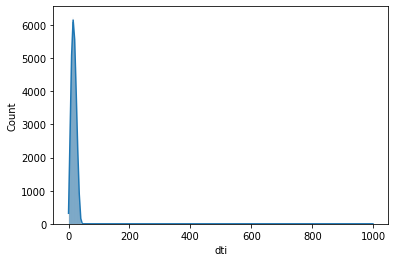

In [61]:
# Distribution plot of 'dti'
sns.histplot(data = loan_data,
             x = 'dti',
             kde = True)

In [62]:
# Descriptive of 'dti' by response loan_status
loan_data['dti'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,17.282881,8.334019,0.0,11.12,16.74,22.95,999.00
1,60617.0,19.194558,8.493575,0.0,12.88,18.93,25.33,54.19


<Axes: xlabel='loan_status', ylabel='dti'>

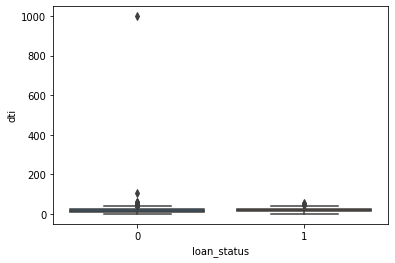

In [63]:
# Boxplot of 'dti' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'dti')

<Axes: xlabel='loan_status', ylabel='dti'>

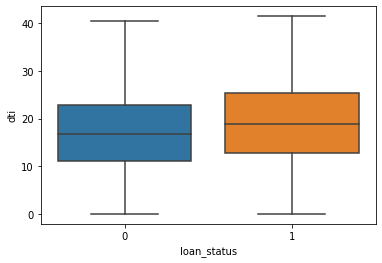

In [64]:
# Boxplot of 'dti' by response variable without outliers
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'dti',
            showfliers = False)

* Median and standard deviation of debt-to-income ratio from bad loan group is higher than from good loan group.
* There are 231 observations with null values that will be treated later
* There are some observations with odds value (-1 and 999) which likely error of input and will be treated by binning later.

##### Predictor 5: `fico_range_low`

In [65]:
# Check null value
loan_data['fico_range_low'].isnull().sum()

0

In [66]:
# Descriptive statistics of 'fico_range_low'
loan_data['fico_range_low'].describe()

count    434690.000000
mean        695.075238
std          31.140928
min         610.000000
25%         670.000000
50%         690.000000
75%         710.000000
max         845.000000
Name: fico_range_low, dtype: float64

<Axes: xlabel='fico_range_low', ylabel='Count'>

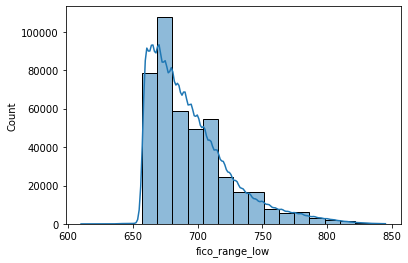

In [67]:
# Distribution plot of 'fico_range_low'
sns.histplot(data = loan_data,
             x = 'fico_range_low',
             bins = 20,
             kde = True)

In [68]:
# Descriptive of 'fico_range_low' by response loan_status
loan_data['fico_range_low'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,696.583140,31.838950,610.0,670.0,690.0,710.0,845.0
1,60617.0,685.769834,24.451098,615.0,665.0,680.0,695.0,845.0


<Axes: xlabel='loan_status', ylabel='fico_range_low'>

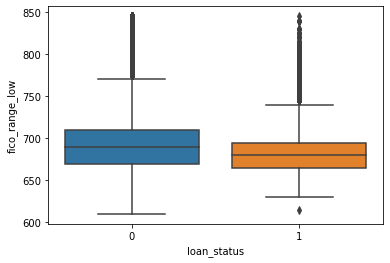

In [69]:
# Boxplot of 'fico_range_low' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'fico_range_low')

* Median and standard deviation of lower boundary range of FICO from bad loan group is lower than from good loan group.

##### Predictor 6: `fico_range_high`

In [70]:
# Check null value
loan_data['fico_range_high'].isnull().sum()

0

In [71]:
# Descriptive statistics of 'fico_range_high'
loan_data['fico_range_high'].describe()

count    434690.000000
mean        699.075339
std          31.141417
min         614.000000
25%         674.000000
50%         694.000000
75%         714.000000
max         850.000000
Name: fico_range_high, dtype: float64

<Axes: xlabel='fico_range_high', ylabel='Count'>

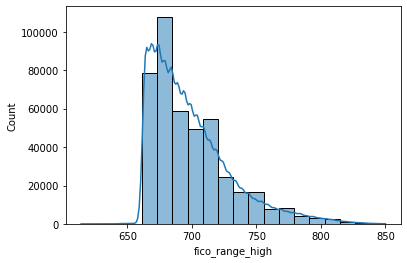

In [72]:
# Distribution plot of 'fico_range_high'
sns.histplot(data = loan_data,
             x = 'fico_range_high',
             bins = 20,
             kde = True)

In [73]:
# Descriptive of 'fico_range_high' by response loan_status
loan_data['fico_range_high'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,700.583255,31.839488,614.0,674.0,694.0,714.0,850.0
1,60617.0,689.769850,24.451206,619.0,669.0,684.0,699.0,850.0


<Axes: xlabel='loan_status', ylabel='fico_range_high'>

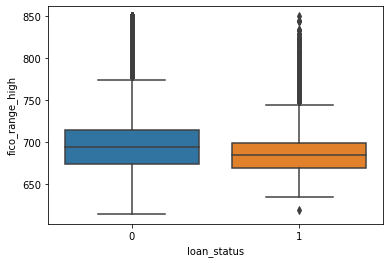

In [74]:
# Boxplot of 'fico_range_high' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'fico_range_high')

* Median and standard deviation of upper boundary range of FICO from bad loan group is lower than from good loan group.

#### **Category 3**

##### Predictor 1:  `open_acc`

In [75]:
# Check null value
loan_data['open_acc'].isnull().sum()

0

In [76]:
# Descriptive statistics of 'open_acc'
loan_data['open_acc'].describe()

count    434690.000000
mean         11.242223
std           5.225389
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          82.000000
Name: open_acc, dtype: float64

<Axes: xlabel='open_acc', ylabel='Count'>

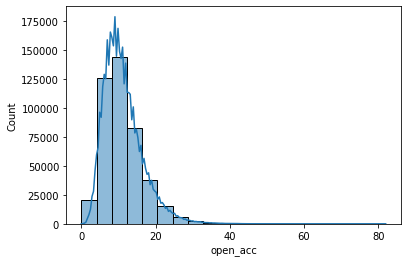

In [77]:
# Distribution plot of 'open_acc'
sns.histplot(data = loan_data,
             x = 'open_acc',
             bins = 20,
             kde = True)

In [78]:
# Descriptive of 'open_acc' by response loan_status
loan_data['open_acc'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,11.218123,5.209908,0.0,8.0,10.0,14.0,82.0
1,60617.0,11.390946,5.317558,0.0,8.0,10.0,14.0,76.0


<Axes: xlabel='loan_status', ylabel='open_acc'>

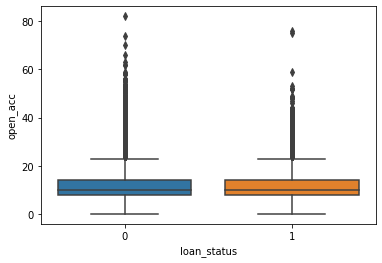

In [79]:
# Boxplot of 'open_acc' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'open_acc')

* Median and standard deviation of the number of open credit lines in the borrower's credit file from bad loan group is similar from good loan group.

##### Predictor 2: `pub_rec`

In [80]:
# Check null value
loan_data['pub_rec'].isnull().sum()

0

In [81]:
# Descriptive statistics of 'pub_rec'
loan_data['pub_rec'].describe()

count    434690.000000
mean          0.205565
std           0.603030
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

In [82]:
# Proportion of attributes for characteristic 'pub_rec'
loan_data['pub_rec'].value_counts(normalize = True)

pub_rec
0.0     0.840008
1.0     0.133060
2.0     0.017622
3.0     0.005427
4.0     0.001884
5.0     0.000890
6.0     0.000513
7.0     0.000212
8.0     0.000138
10.0    0.000060
9.0     0.000058
11.0    0.000032
13.0    0.000025
12.0    0.000016
15.0    0.000012
18.0    0.000007
16.0    0.000007
21.0    0.000007
17.0    0.000002
54.0    0.000002
49.0    0.000002
19.0    0.000002
28.0    0.000002
40.0    0.000002
23.0    0.000002
14.0    0.000002
63.0    0.000002
34.0    0.000002
Name: proportion, dtype: float64

From the descriptive statistics, proportion of value 0 is the largest. We can set 4 value: 0, 1, 2, 3 with 3 for original value > 2.

In [83]:
# Replace value more than 2 become 3
loan_data['pub_rec'] = loan_data['pub_rec'].map(lambda x: 3 if x > 2 else x)

In [84]:
# Describe the proportion of `pub_rec`
loan_data['pub_rec'].value_counts(normalize = True)

pub_rec
0.0    0.840008
1.0    0.133060
2.0    0.017622
3.0    0.009310
Name: proportion, dtype: float64

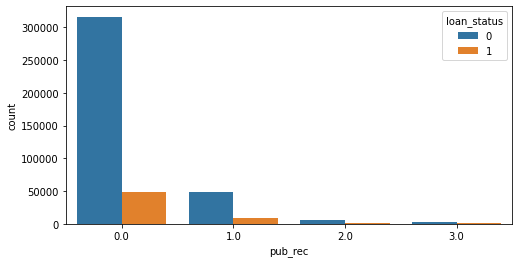

In [85]:
# Create plot count for pub_rec with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'pub_rec',
              hue = response_variable)

plt.show()

In [86]:
# Crosstab for pub_rec
odds_pub_rec = calculate_odds(data = loan_data,
                              predictor_label = 'pub_rec')

odds_pub_rec

loan_status,0,1,Odds
pub_rec,,,
2.0,6378,1282,0.20
1.0,48453,9387,0.19
3.0,3396,651,0.19
0.0,315846,49297,0.16


* Odds of bad loan for non-zero derogatory public records is higher than debtors without records.

##### Predictor 3: `pub_rec_bankruptcies`

In [87]:
# Check null value
loan_data['pub_rec_bankruptcies'].isnull().sum()

915

In [88]:
# Descriptive statistics of 'pub_rec_bankruptcies'
loan_data['pub_rec_bankruptcies'].describe()

count    433775.000000
mean          0.125155
std           0.366773
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: pub_rec_bankruptcies, dtype: float64

In [89]:
# Proportion of attributes for characteristic 'pub_rec_bankruptcies'
loan_data['pub_rec_bankruptcies'].value_counts(normalize = True)

pub_rec_bankruptcies
0.0     0.883951
1.0     0.109151
2.0     0.005385
3.0     0.001086
4.0     0.000270
5.0     0.000101
6.0     0.000025
7.0     0.000018
8.0     0.000007
12.0    0.000002
11.0    0.000002
Name: proportion, dtype: float64

From the descriptive statistics, proportion of value 0 is the largest. We can set 4 value: 0, 1, 2, 3 with 3 for original value > 2.

In [90]:
# Replace value more than 2 become 3
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].map(lambda x: 3 if x > 2 else x)

In [91]:
# Describe the proportion of `pub_rec_bankruptcies`
loan_data['pub_rec_bankruptcies'].value_counts(normalize = True)

pub_rec_bankruptcies
0.0    0.883951
1.0    0.109151
2.0    0.005385
3.0    0.001512
Name: proportion, dtype: float64

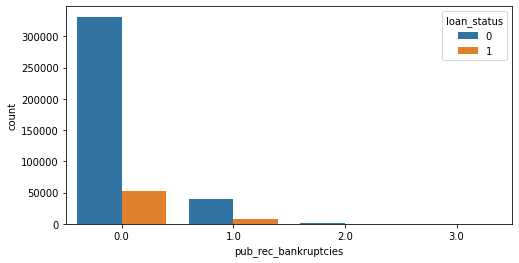

In [92]:
# Create plot count for pub_rec with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'pub_rec_bankruptcies',
              hue = response_variable)

plt.show()

In [93]:
# Crosstab for pub_rec_bankruptcies
odds_pub_rec_b = calculate_odds(data = loan_data,
                                predictor_label = 'pub_rec_bankruptcies')

odds_pub_rec_b

loan_status,0,1,Odds
pub_rec_bankruptcies,,,
2.0,1907,429,0.22
3.0,537,119,0.22
1.0,39638,7709,0.19
0.0,331312,52124,0.16


* High number public records bankruptcies leads to higher odds of bad loan.

##### Predictor 4: `revol_util`

In [94]:
# Check null value
loan_data['revol_util'].isnull().sum()

253

In [95]:
# Descriptive statistics of 'revol_util'
loan_data['revol_util'].describe()

count    434437.000000
mean         53.735141
std          23.918420
min           0.000000
25%          36.100000
50%          54.300000
75%          72.100000
max         892.300000
Name: revol_util, dtype: float64

Since revol_util is ratio in percentage and we see max value 892.3 which is too high and probably an outlier. We check the outlier first.

In [96]:
# Value revol_util > 150 to check the outliers
loan_data[loan_data['revol_util'] > 150]['revol_util']

19798     182.8
26700     177.7
71259     184.6
126236    155.3
178990    892.3
186107    153.0
220009    150.7
415333    193.0
418053    152.7
Name: revol_util, dtype: float64

(0.0, 200.0)

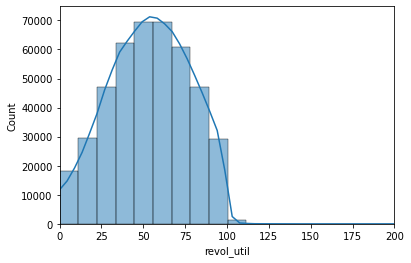

In [97]:
# Distribution plot of 'revol_util'
sns.histplot(data = loan_data,
             x = 'revol_util',
             bins = 80,
             kde = True)

plt.xlim(0,200)

In [98]:
# Descriptive of 'revol_util' by response loan_status
loan_data['revol_util'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,373863.0,53.325694,23.989222,0.0,35.6,53.9,71.8,892.3
1,60574.0,56.262255,23.318309,0.0,39.4,57.1,74.2,182.8


<Axes: xlabel='loan_status', ylabel='revol_util'>

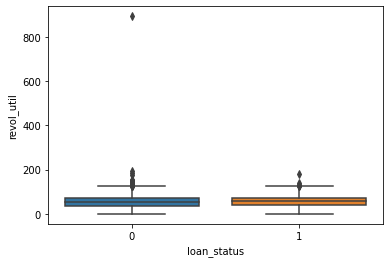

In [99]:
# Boxplot of 'revol_util' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'revol_util')

<Axes: xlabel='loan_status', ylabel='revol_util'>

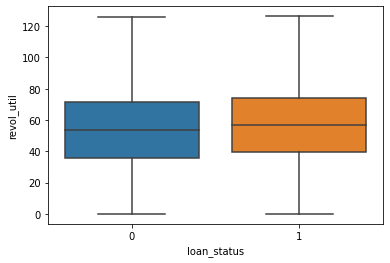

In [100]:
# Boxplot of 'revol_util' by response variable without outliers
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'revol_util',
            showfliers = False)

* There is some outliers from good loan group with value > 150 which can be treated by binning.
* Median of revolving line utilization rate is higher from bad loan group.

##### Predictor 5: `num_bc_tl`

In [101]:
# Check null value
loan_data['num_bc_tl'].isnull().sum()

38010

In [102]:
# Descriptive statistics of 'num_bc_tl'
loan_data['num_bc_tl'].describe()

count    396680.000000
mean          8.301704
std           4.832938
min           0.000000
25%           5.000000
50%           7.000000
75%          11.000000
max          65.000000
Name: num_bc_tl, dtype: float64

<Axes: xlabel='num_bc_tl', ylabel='Count'>

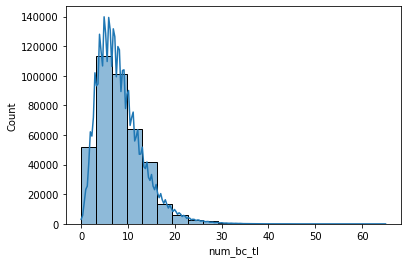

In [103]:
# Distribution plot of 'num_bc_tl'
sns.histplot(data = loan_data,
             x = 'num_bc_tl',
             bins = 20,
             kde = True)

In [104]:
# Descriptive of 'num_bc_tl' by response loan_status
loan_data['num_bc_tl'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,341022.0,8.333198,4.830427,0.0,5.0,7.0,11.0,65.0
1,55658.0,8.108735,4.843869,0.0,5.0,7.0,11.0,52.0


<Axes: xlabel='loan_status', ylabel='num_bc_tl'>

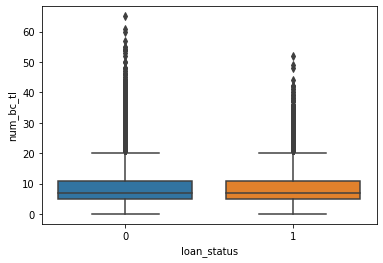

In [105]:
# Boxplot of 'num_bc_tl' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'num_bc_tl')

* Median of number of bankcard accounts from both group is same with similar standard deviation.
* Mean value from bad loan group is slightly lower.

##### Predictor 6: `num_il_tl`

In [106]:
# Check null value
loan_data['num_il_tl'].isnull().sum()

38010

In [107]:
# Descriptive statistics of 'num_il_tl'
loan_data['num_il_tl'].describe()

count    396680.000000
mean          8.060606
std           7.148583
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max         150.000000
Name: num_il_tl, dtype: float64

<Axes: xlabel='num_il_tl', ylabel='Count'>

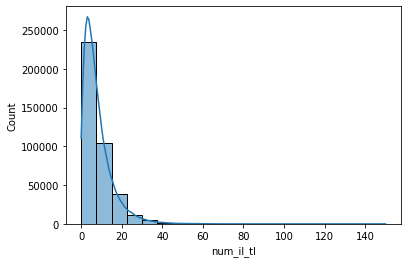

In [108]:
# Distribution plot of 'num_il_tl'
sns.histplot(data = loan_data,
             x = 'num_il_tl',
             bins = 20,
             kde = True)

In [109]:
# Descriptive of 'num_il_tl' by response loan_status
loan_data['num_il_tl'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,341022.0,8.081866,7.116160,0.0,3.0,6.0,11.0,150.0
1,55658.0,7.930342,7.342837,0.0,3.0,6.0,11.0,118.0


<Axes: xlabel='loan_status', ylabel='num_il_tl'>

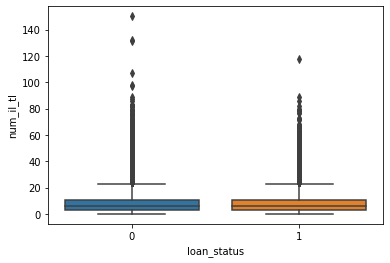

In [110]:
# Boxplot of 'num_il_tl' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'num_il_tl')

* Median of installment accounts from both group is same with similar standard deviation.

##### Predictor 7: `num_op_rev_tl`

In [111]:
# Check null value
loan_data['num_op_rev_tl'].isnull().sum()

38010

In [112]:
# Descriptive statistics of 'num_op_rev_tl'
loan_data['num_op_rev_tl'].describe()

count    396680.000000
mean          8.150008
std           4.351358
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          67.000000
Name: num_op_rev_tl, dtype: float64

<Axes: xlabel='num_op_rev_tl', ylabel='Count'>

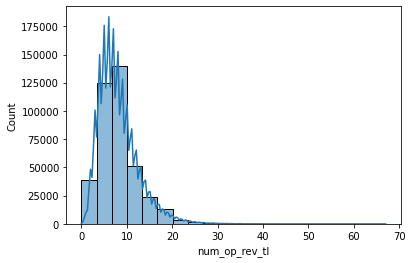

In [113]:
# Distribution plot of 'num_op_rev_tl'
sns.histplot(data = loan_data,
             x = 'num_op_rev_tl',
             bins = 20,
             kde = True)

In [114]:
# Descriptive of 'num_op_rev_tl' by response loan_status
loan_data['num_op_rev_tl'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,341022.0,8.107322,4.332061,0.0,5.0,7.0,10.0,67.0
1,55658.0,8.411549,4.458901,0.0,5.0,8.0,11.0,62.0


<Axes: xlabel='loan_status', ylabel='num_op_rev_tl'>

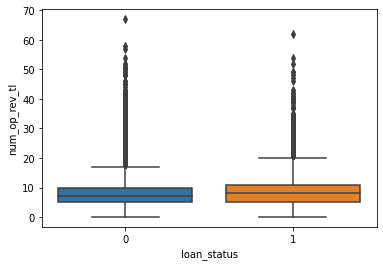

In [115]:
# Boxplot of 'num_op_rev_tl' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'num_op_rev_tl')

* Median and standar deviation of number of open revolving accounts from bad loan group is slightly higher than from good loan group.

##### Predictor 8: `num_rev_accts`

In [116]:
# Check null value
loan_data['num_rev_accts'].isnull().sum()

38011

In [117]:
# Descriptive statistics of 'num_rev_accts'
loan_data['num_rev_accts'].describe()

count    396679.000000
mean         14.742074
std           8.040427
min           0.000000
25%           9.000000
50%          13.000000
75%          19.000000
max          94.000000
Name: num_rev_accts, dtype: float64

<Axes: xlabel='num_rev_accts', ylabel='Count'>

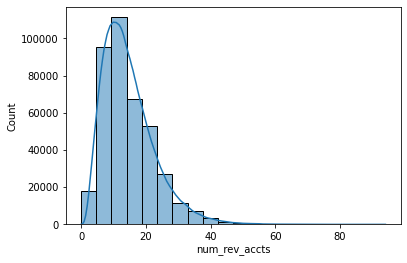

In [118]:
# Distribution plot of 'num_rev_accts'
sns.histplot(data = loan_data,
             x = 'num_rev_accts',
             bins = 20,
             kde = True)

In [119]:
# Descriptive of 'num_rev_accts' by response loan_status
loan_data['num_rev_accts'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,341021.0,14.760839,8.027079,1.0,9.0,13.0,19.0,94.0
1,55658.0,14.627098,8.120859,0.0,9.0,13.0,19.0,81.0


<Axes: xlabel='loan_status', ylabel='num_rev_accts'>

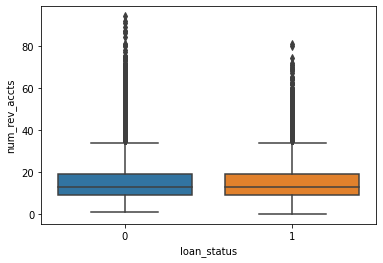

In [120]:
# Boxplot of 'num_rev_accts' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'num_rev_accts')

* Median and standard deviation of number of revolving accounts from both group is similar.

##### Predictor 9: `num_rev_tl_bal_gt_0`

In [121]:
# Check null value
loan_data['num_rev_tl_bal_gt_0'].isnull().sum()

38010

In [122]:
# Descriptive statistics of 'num_rev_tl_bal_gt_0'
loan_data['num_rev_tl_bal_gt_0'].describe()

count    396680.000000
mean          5.627513
std           3.121637
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          45.000000
Name: num_rev_tl_bal_gt_0, dtype: float64

<Axes: xlabel='num_rev_tl_bal_gt_0', ylabel='Count'>

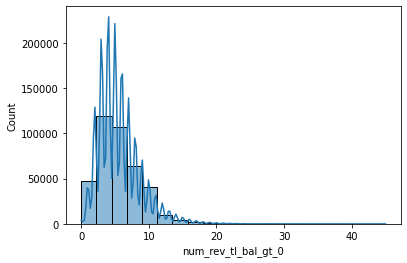

In [123]:
# Distribution plot of 'num_rev_tl_bal_gt_0'
sns.histplot(data = loan_data,
             x = 'num_rev_tl_bal_gt_0',
             bins = 20,
             kde = True)

In [124]:
# Descriptive of 'num_rev_tl_bal_gt_0' by response loan_status
loan_data['num_rev_tl_bal_gt_0'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,341022.0,5.561489,3.085851,0.0,3.0,5.0,7.0,45.0
1,55658.0,6.032053,3.303869,0.0,4.0,5.0,8.0,39.0


<Axes: xlabel='loan_status', ylabel='num_rev_tl_bal_gt_0'>

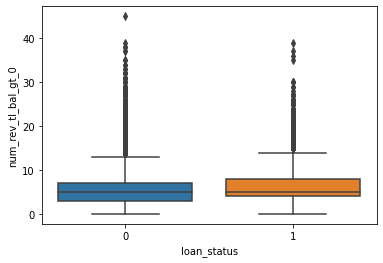

In [125]:
# Boxplot of 'num_rev_tl_bal_gt_0' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'num_rev_tl_bal_gt_0')

* Median of number of revolving trades with balance > 0 from both group is same, but mean from bad loan group is higher than from good loan group.

##### Predictor 10: `num_sats`

In [126]:
# Check null value
loan_data['num_sats'].isnull().sum()

31276

In [127]:
# Descriptive statistics of 'num_sats'
loan_data['num_sats'].describe()

count    403414.000000
mean         11.339934
std           5.243322
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          82.000000
Name: num_sats, dtype: float64

<Axes: xlabel='num_sats', ylabel='Count'>

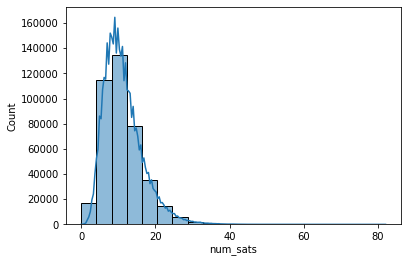

In [128]:
# Distribution plot of 'num_sats'
sns.histplot(data = loan_data,
             x = 'num_sats',
             bins = 20,
             kde = True)

In [129]:
# Descriptive of 'num_sats' by response loan_status
loan_data['num_sats'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,346749.0,11.315225,5.231151,0.0,8.0,10.0,14.0,82.0
1,56665.0,11.491132,5.314741,0.0,8.0,11.0,14.0,75.0


<Axes: xlabel='loan_status', ylabel='num_sats'>

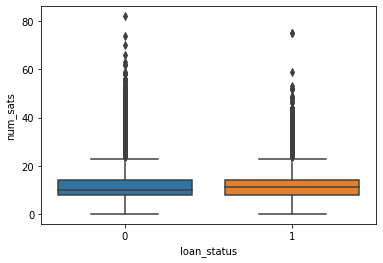

In [130]:
# Boxplot of 'num_sats' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'num_sats')

* Median and mean of number of satisfactory bankcard accounts from bad loan group is slightly higher.

##### Predictor 11: `mo_sin_old_il_acct`

In [131]:
# Check null value
loan_data['mo_sin_old_il_acct'].isnull().sum()

52974

In [132]:
# Descriptive statistics of 'mo_sin_old_il_acct'
loan_data['mo_sin_old_il_acct'].describe()

count    381716.000000
mean        124.815143
std          52.560239
min           0.000000
25%          95.000000
50%         128.000000
75%         152.000000
max         720.000000
Name: mo_sin_old_il_acct, dtype: float64

<Axes: xlabel='mo_sin_old_il_acct', ylabel='Count'>

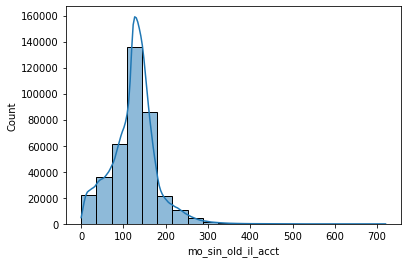

In [133]:
# Distribution plot of 'mo_sin_old_il_acct'
sns.histplot(data = loan_data,
             x = 'mo_sin_old_il_acct',
             bins = 20,
             kde = True)

In [134]:
# Descriptive of 'mo_sin_old_il_acct' by response loan_status
loan_data['mo_sin_old_il_acct'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,328535.0,125.624831,52.061240,0.0,97.0,129.0,152.0,549.0
1,53181.0,119.813148,55.281802,1.0,87.0,124.0,149.0,720.0


<Axes: xlabel='loan_status', ylabel='mo_sin_old_il_acct'>

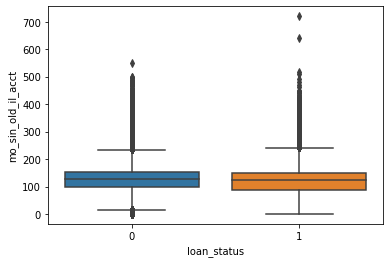

In [135]:
# Boxplot of 'mo_sin_old_il_acct' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'mo_sin_old_il_acct')

* Median and mean of months since oldest bank installment account opened from bad loan group is lower than from good loan group.

##### Predictor 12: `mo_sin_old_rev_tl_op`

In [136]:
# Check null value
loan_data['mo_sin_old_rev_tl_op'].isnull().sum()

38011

In [137]:
# Descriptive statistics of 'mo_sin_old_rev_tl_op'
loan_data['mo_sin_old_rev_tl_op'].describe()

count    396679.000000
mean        181.602409
std          94.758623
min           3.000000
25%         115.000000
50%         164.000000
75%         230.000000
max         851.000000
Name: mo_sin_old_rev_tl_op, dtype: float64

<Axes: xlabel='mo_sin_old_rev_tl_op', ylabel='Count'>

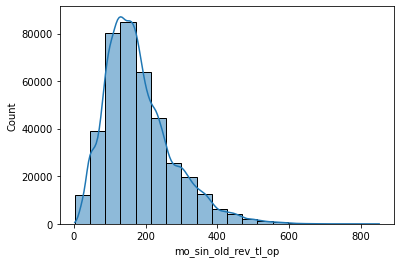

In [138]:
# Distribution plot of 'mo_sin_old_rev_tl_op'
sns.histplot(data = loan_data,
             x = 'mo_sin_old_rev_tl_op',
             bins = 20,
             kde = True)

In [139]:
# Descriptive of 'mo_sin_old_rev_tl_op' by response loan_status
loan_data['mo_sin_old_rev_tl_op'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,341022.0,183.718440,94.652754,3.0,117.0,166.0,233.0,851.0
1,55657.0,168.637045,94.375249,6.0,104.0,151.0,213.0,757.0


<Axes: xlabel='loan_status', ylabel='mo_sin_old_rev_tl_op'>

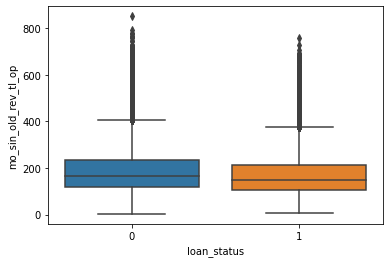

In [140]:
# Boxplot of 'mo_sin_old_rev_tl_op' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'mo_sin_old_rev_tl_op')

* Median and mean of months since oldest revolving account opened from bad loan group is lower than from good loan group.

##### Predictor 13: `delinq_2yrs`

In [141]:
# Check null value
loan_data['delinq_2yrs'].isnull().sum()

0

In [142]:
# Descriptive statistics of 'delinq_2yrs'
loan_data['delinq_2yrs'].describe()

count    434690.000000
mean          0.314302
std           0.866533
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [143]:
# Proportion of attributes for characteristic 'delinq_2yrs'
loan_data['delinq_2yrs'].value_counts(normalize = True)

delinq_2yrs
0.0     0.809000
1.0     0.126603
2.0     0.037645
3.0     0.013506
4.0     0.005942
5.0     0.003133
6.0     0.001652
7.0     0.000939
8.0     0.000518
9.0     0.000334
10.0    0.000253
11.0    0.000138
12.0    0.000104
13.0    0.000074
14.0    0.000058
16.0    0.000030
15.0    0.000028
18.0    0.000018
17.0    0.000009
19.0    0.000007
20.0    0.000002
21.0    0.000002
22.0    0.000002
24.0    0.000002
29.0    0.000002
Name: proportion, dtype: float64

From the descriptive statistics, proportion of value 0 is the largest. We can set 4 value: 0, 1, 2, 3 with 3 for original value > 2.

In [144]:
# Replace value more than 2 become 3
loan_data['delinq_2yrs'] = loan_data['delinq_2yrs'].map(lambda x: 3 if x > 2 else x)

In [145]:
# Describe the proportion of `delinq_2yrs`
loan_data['delinq_2yrs'].value_counts(normalize = True)

delinq_2yrs
0.0    0.809000
1.0    0.126603
2.0    0.037645
3.0    0.026752
Name: proportion, dtype: float64

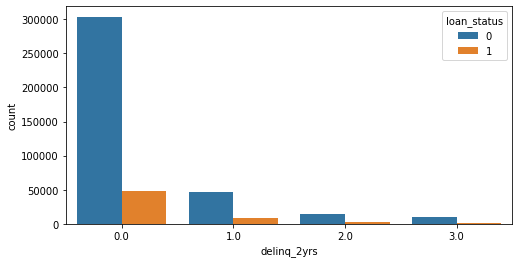

In [146]:
# Create plot count for delinq_2yrs with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'delinq_2yrs',
              hue = response_variable)

plt.show()

In [147]:
# Crosstab for delinq_2yrs
odds_delinq = calculate_odds(data = loan_data,
                             predictor_label = 'delinq_2yrs')

odds_delinq

loan_status,0,1,Odds
delinq_2yrs,,,
2.0,13777,2587,0.19
3.0,9771,1858,0.19
1.0,47076,7957,0.17
0.0,303449,48215,0.16


* Odds of bad loan for non-zero number of 30+ days past-due incidences is higher.

##### Predictor 14: `mort_acc`

In [148]:
# Check null value
loan_data['mort_acc'].isnull().sum()

26340

In [149]:
# Descriptive statistics of 'mort_acc'
loan_data['mort_acc'].describe()

count    408350.000000
mean          1.621190
std           2.039517
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          35.000000
Name: mort_acc, dtype: float64

In [150]:
# Proportion of attributes for characteristic 'mort_acc'
loan_data['mort_acc'].value_counts(normalize = True)

mort_acc
0.0     0.434698
1.0     0.163159
2.0     0.133146
3.0     0.100022
4.0     0.070738
5.0     0.043852
6.0     0.026027
7.0     0.013525
8.0     0.006722
9.0     0.003732
10.0    0.001856
11.0    0.000982
12.0    0.000561
13.0    0.000326
14.0    0.000220
15.0    0.000113
16.0    0.000088
18.0    0.000056
17.0    0.000044
19.0    0.000039
20.0    0.000020
23.0    0.000012
24.0    0.000012
21.0    0.000010
25.0    0.000010
22.0    0.000007
27.0    0.000007
31.0    0.000005
35.0    0.000002
26.0    0.000002
30.0    0.000002
34.0    0.000002
Name: proportion, dtype: float64

From the descriptive statistics, proportion of value 0 is the largest. We can set 4 value: 0, 1, 2, 3 with 3 for original value > 2.

In [151]:
# Replace value more than 2 become 3
loan_data['mort_acc'] = loan_data['mort_acc'].map(lambda x: 3 if x > 2 else x)

In [152]:
# Describe the proportion of `mort_acc`
loan_data['mort_acc'].value_counts(normalize = True)

mort_acc
0.0    0.434698
3.0    0.268997
1.0    0.163159
2.0    0.133146
Name: proportion, dtype: float64

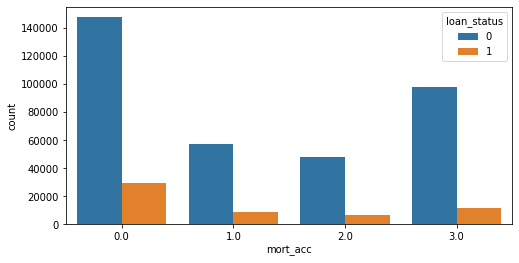

In [153]:
# Create plot count for mort_acc with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'mort_acc',
              hue = response_variable)

plt.show()

In [154]:
# Crosstab for mort_acc
odds_delinq = calculate_odds(data = loan_data,
                             predictor_label = 'mort_acc')

odds_delinq

loan_status,0,1,Odds
mort_acc,,,
0.0,147699,29810,0.20
1.0,57582,9044,0.16
2.0,47737,6633,0.14
3.0,98008,11837,0.12


* Median and mean of number of mortgage accounts from bad loan group is lower from good loan group.

##### Predictor 15: `revol_bal`

In [155]:
# Check null value
loan_data['revol_bal'].isnull().sum()

0

In [156]:
# Descriptive statistics of 'revol_bal'
loan_data['revol_bal'].describe()

count    4.346900e+05
mean     1.553887e+04
std      2.188189e+04
min      0.000000e+00
25%      5.801000e+03
50%      1.061100e+04
75%      1.872000e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

<Axes: xlabel='revol_bal', ylabel='Count'>

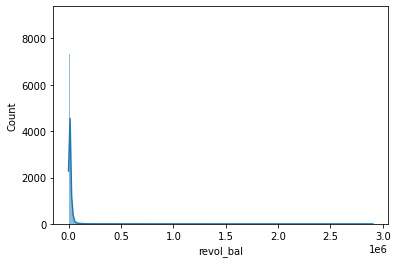

In [157]:
# Distribution plot of 'revol_bal'
sns.histplot(data = loan_data,
             x = 'revol_bal',
             kde = True)

In [158]:
# Descriptive of 'revol_bal' by response loan_status
loan_data['revol_bal'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,15828.514549,22486.110609,0.0,5867.0,10759.0,19047.0,2904836.0
1,60617.0,13751.448439,17597.568600,0.0,5423.0,9770.0,16816.0,1030826.0


<Axes: xlabel='loan_status', ylabel='revol_bal'>

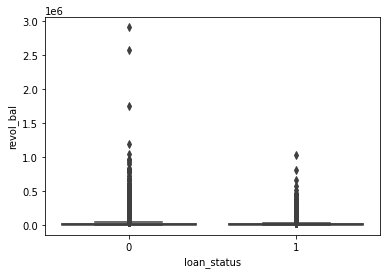

In [159]:
# Boxplot of 'revol_bal' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'revol_bal')

<Axes: xlabel='loan_status', ylabel='revol_bal'>

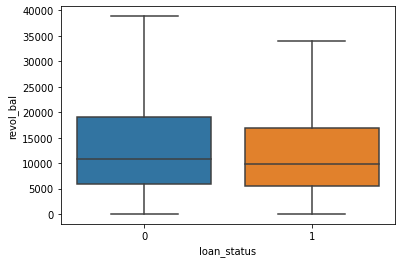

In [160]:
# Boxplot of 'revol_bal' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'revol_bal',
            showfliers = False)

* Median and mean of total credit revolving balance from bad loan group is lower from good loan group.

##### Predictor 16: `initial_list_status`

In [161]:
# Check null value
loan_data['initial_list_status'].isnull().sum()

0

In [162]:
# Describe the proportion of `initial_list_status` 
loan_data['initial_list_status'].value_counts(normalize = True)

initial_list_status
f    0.558214
w    0.441786
Name: proportion, dtype: float64

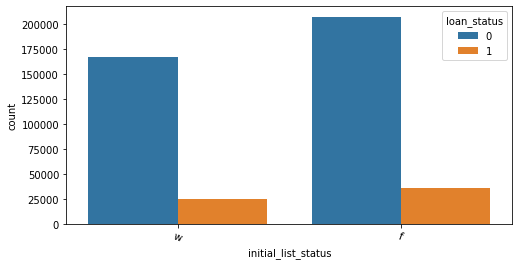

In [163]:
# Create plot count for `initial_list_status` with response variable
plt.figure(figsize = (8,4))

sns.countplot(data = loan_data,
              x = 'initial_list_status',
              hue = response_variable)

plt.xticks(rotation = -20)  
plt.show()

In [164]:
# Crosstab for `initial_list_status`
odds_init_status = calculate_odds(data = loan_data,
                                  predictor_label = 'initial_list_status')

odds_init_status

loan_status,0,1,Odds
initial_list_status,,,
f,207202,35448,0.17
w,166871,25169,0.15


* Odds of bad loan for loan which initially listed in fractional (f) market is higher than initially listed in whole (w) market.

##### Predictor 17: `earliest_cr_line`

In [165]:
# Check null value
loan_data['earliest_cr_line'].isnull().sum()

0

In [166]:
# Convert the values into ordinal value
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'],
                                               format = '%b-%Y')

loan_data['earliest_cr_line'] = (loan_data[loan_data['earliest_cr_line'].notnull()]['earliest_cr_line'] - loan_data['earliest_cr_line'].min())
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x.days)

In [167]:
# Descriptive statistics of 'earliest_cr_line'
loan_data['earliest_cr_line'].describe()

count    434690.000000
mean      19866.023589
std        2759.282183
min           0.000000
25%       18506.000000
50%       20393.000000
75%       21762.000000
max       25142.000000
Name: earliest_cr_line, dtype: float64

<Axes: xlabel='earliest_cr_line', ylabel='Count'>

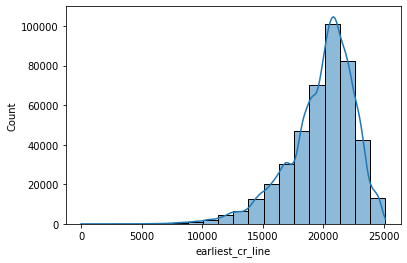

In [168]:
# Distribution plot of 'earliest_cr_line'
sns.histplot(data = loan_data,
             x = 'earliest_cr_line',
             bins = 20,
             kde = True)

In [169]:
# Descriptive of 'earliest_cr_line' by response loan_status
loan_data['earliest_cr_line'].groupby(loan_data[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,374073.0,19815.736100,2757.903791,0.0,18444.0,20362.0,21731.0,25142.0
1,60617.0,20176.352244,2747.504911,2922.0,18871.0,20698.0,22036.0,25142.0


<Axes: xlabel='loan_status', ylabel='earliest_cr_line'>

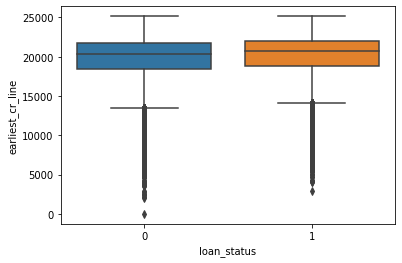

In [170]:
# Boxplot of 'earliest_cr_line' by response variable
sns.boxplot(data = loan_data,
            x = response_variable,
            y = 'earliest_cr_line')

* High value on earliest_cr_line means that earliest reported credit line was opened on recent.
* Median and mean of earliest_cr_line from bad loan group is higher from good loan group.

#### **Check Correlation**

In [171]:
# Numerical characteristics
num_columns = ['emp_length', 'annual_inc', 'loan_amnt', 'int_rate', 'dti', 'fico_range_low', 'fico_range_high', 'open_acc', 
               'pub_rec', 'pub_rec_bankruptcies', 'revol_util', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
               'num_rev_tl_bal_gt_0', 'num_sats', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'delinq_2yrs', 'mort_acc',
               'revol_bal', 'earliest_cr_line']

In [172]:
# Categorical characteristics
cat_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'application_type', 'grade', 'initial_list_status']

In [173]:
# Calculate Pearson correlation coefficient from numerical characteritics
loan_data_corr = loan_data[num_columns].corr(method = 'pearson')

loan_data_corr

,emp_length,annual_inc,loan_amnt,int_rate,dti,fico_range_low,fico_range_high,open_acc,pub_rec,pub_rec_bankruptcies,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,delinq_2yrs,mort_acc,revol_bal,earliest_cr_line
emp_length,1.000000,0.072537,0.083540,-0.028313,0.040299,0.019090,0.019091,0.042819,0.050228,0.038538,...,0.115838,0.153167,0.130421,0.030603,0.142132,0.222965,0.039717,0.227914,0.087592,-0.231742
annual_inc,0.072537,1.000000,0.344262,-0.124712,-0.174297,0.092083,0.092083,0.141941,-0.016109,-0.055910,...,0.080695,0.112165,0.067284,0.139168,0.126335,0.146610,0.054283,0.229473,0.307126,-0.149432
loan_amnt,0.083540,0.344262,1.000000,-0.089918,-0.001826,0.135589,0.135588,0.192596,-0.090838,-0.118809,...,0.182518,0.184470,0.152983,0.187936,0.124341,0.182311,0.001891,0.221990,0.336185,-0.165187
int_rate,-0.028313,-0.124712,-0.089918,1.000000,0.139005,-0.495698,-0.495695,-0.065133,0.082708,0.077689,...,-0.049756,-0.096211,0.068032,-0.076985,-0.123938,-0.181109,0.070045,-0.157687,-0.089985,0.141730
dti,0.040299,-0.174297,-0.001826,0.139005,1.000000,-0.092111,-0.092113,0.288714,-0.040058,-0.026261,...,0.172108,0.120673,0.240714,0.277495,0.029123,0.036441,0.000784,-0.045607,0.121195,-0.023931
fico_range_low,0.019090,0.092083,0.135589,-0.495698,-0.092111,1.000000,1.000000,0.025860,-0.222604,-0.212207,...,0.030859,0.030345,-0.164902,0.052290,0.028854,0.123441,-0.195616,0.114795,0.056285,-0.120933
fico_range_high,0.019091,0.092083,0.135588,-0.495695,-0.092113,1.000000,1.000000,0.025859,-0.222601,-0.212205,...,0.030858,0.030345,-0.164902,0.052288,0.028854,0.123444,-0.195614,0.114796,0.056283,-0.120935
open_acc,0.042819,0.141941,0.192596,-0.065133,0.288714,0.025860,0.025859,1.000000,-0.026981,-0.037659,...,0.818265,0.622563,0.656609,0.998593,0.127129,0.138623,0.060113,0.127256,0.222663,-0.131789
pub_rec,0.050228,-0.016109,-0.090838,0.082708,-0.040058,-0.222604,-0.222601,-0.026981,1.000000,0.729918,...,-0.008854,0.039838,-0.017328,-0.042867,0.061680,0.074988,-0.018513,0.030103,-0.107363,-0.081378
pub_rec_bankruptcies,0.038538,-0.055910,-0.118809,0.077689,-0.026261,-0.212207,-0.212205,-0.037659,0.729918,1.000000,...,-0.014405,0.072503,-0.033680,-0.054739,0.054276,0.071577,-0.047310,0.047489,-0.120538,-0.072358


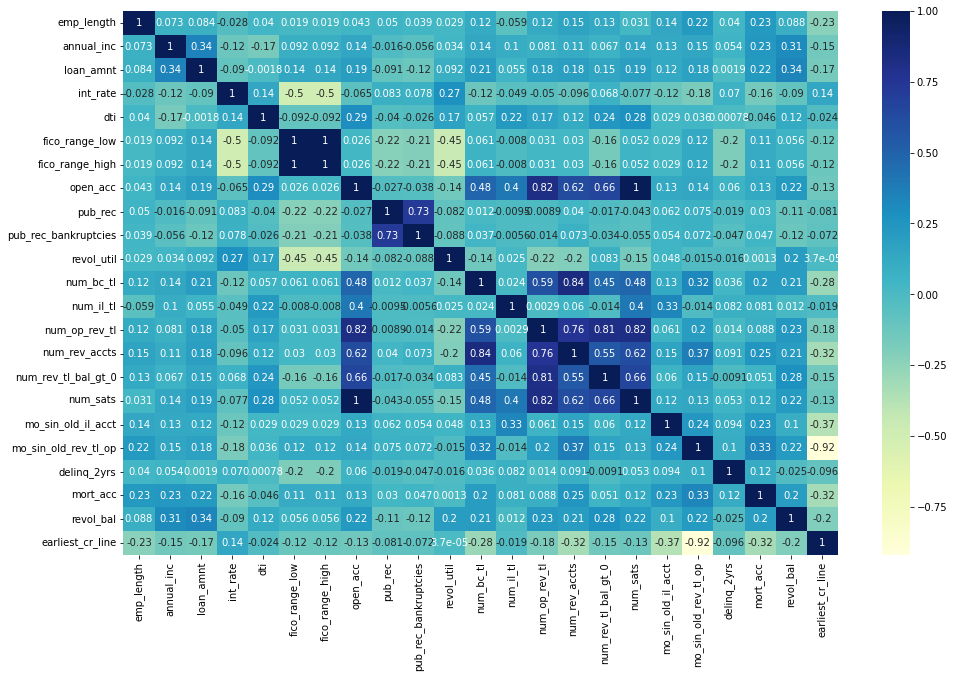

In [174]:
# Plot the heatmap correlation
plt.figure(figsize = (16,10))

sns.heatmap(data = loan_data_corr,
            cmap = 'YlGnBu',
            annot = True)

plt.show()

* We will define high correlation with coefficient in range [0.5, 1] or [-1, -0.5]:
    * `fico_range_low` and `fico_range_high` (1) 
    * `open_acc` and `num_sats` (1) 
    * `mo_sin_old_rev_tl_op` and `earliest_cr_line` (-0.92)

    * `num_bc_tl` and  `num_rev_accts` (0.84)
    * `open_acc` and `num_sats` with `num_op_rev_tl` (0.82)
    * `num_op_rev_tl` and `num_rev_tl_bal_gt_0` (0.81)
    * `num_op_rev_tl` and `num_rev_accts` (0.76)
    
    * `open_acc` and `num_sats` with `num_rev_tl_bal_gt_0` (0.66)
    * `open_acc` and `num_sats` with `num_rev_accts` (0.62)
    * `num_op_rev_tl` and `num_bc_tl` (0.59)
    * `num_rev_accts` and `num_rev_tl_bal_gt_0` (0.55)
    * `fico_range_low` and `fico_range_high` with `int_rate` (-0.5)

* 3 first pairs which have the highest correlation coefficient would be a sign to drop these characteristics: `fico_range_high`, `num_sats`, `earliest_cr_line`.
* For other characteristics have quite complex relations and we will use them for model selection later.

In [175]:
# Drop columns from loan data
drop_cols = ['fico_range_high', 'num_sats', 'earliest_cr_line']

loan_data = loan_data.drop(columns = drop_cols)

loan_data.shape

(434690, 29)

New numerical dan categorical characteristics.

In [176]:
# Numerical characteristics
num_columns = ['emp_length', 'annual_inc', 'loan_amnt', 'int_rate', 'dti', 'fico_range_low', 'open_acc', 
               'revol_util', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
               'num_rev_tl_bal_gt_0', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'revol_bal']

In [177]:
# Categorical characteristics
cat_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'application_type', 'grade', 'initial_list_status',
               'pub_rec', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mort_acc']

#### **Export Data After EDA**

In [178]:
loan_data.to_csv('train_after_eda.csv', index=False)